In [90]:
%tensorflow_version 1.x
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score
s = tf.InteractiveSession()

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [180]:
data = pd.read_csv('/content/drive/My Drive/DL-HW1/Q1_train.csv')

In [181]:
#Getting the labels
labels = data.iloc[:,0]
data.drop(columns = ['label'],inplace = True)
#standarizing
data = data/255

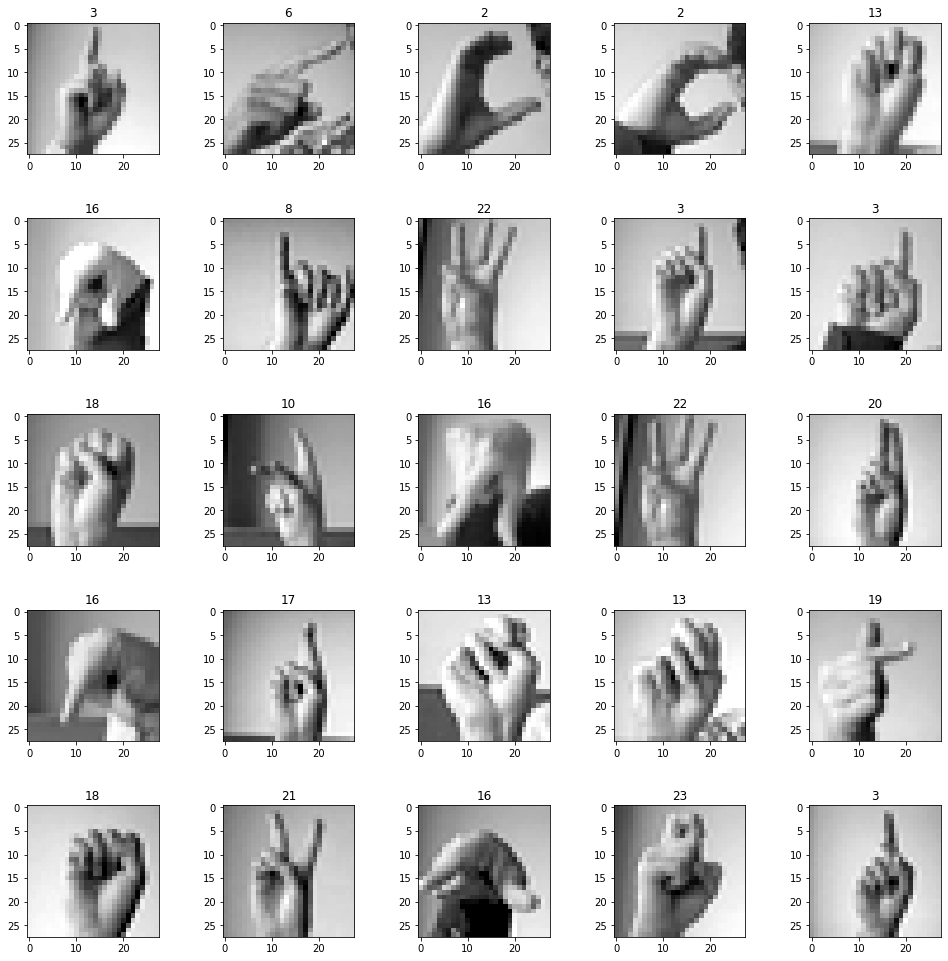

In [176]:
fig , ax = plt.subplots(nrows=5, ncols= 5, figsize = (14, 14))
ax = ax.flatten()
fig.tight_layout(pad=3.0)
for i, a in enumerate(ax):   
    a.imshow(data.values[i][:].reshape(28, 28), cmap = 'gray')
    a.set(title = str(labels[i]))

In [182]:
#splitting the data
X_train, X_validation, y_train, y_validation = train_test_split(data, labels,test_size = 0.2, random_state = 123)
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_validation = lb.transform(y_validation)

In [183]:
num_classes = y_train.shape[1]
num_features = X_train.shape[1]
num_output = y_train.shape[1]
num_layers_0 = 512
num_layers_1 = 256
num_layers_2 = 128
starter_learning_rate = 0.0005

In [184]:
X_in = tf.placeholder('float32',shape =(None,num_features),name="X_in")
y_in = tf.placeholder('float32',shape = (None,num_classes),name='y_in')

In [185]:
# Weights initialized by random normal function with std_dev = sqrt(4/(number of input features+ number of output features)
weights_0 = tf.Variable(tf.random_normal([num_features,num_layers_0], stddev=(tf.sqrt(4/float(num_features + num_layers_0 )))))
bias_0 = tf.Variable(tf.random_normal([num_layers_0]))
weights_1 = tf.Variable(tf.random_normal([num_layers_0,num_layers_1], stddev=(tf.sqrt(4/float(num_layers_0 + num_layers_1)))))
bias_1 = tf.Variable(tf.random_normal([num_layers_1]))
weights_2 = tf.Variable(tf.random_normal([num_layers_1,num_layers_2], stddev=(tf.sqrt(4/float(num_layers_1 + num_layers_2)))))
bias_2 = tf.Variable(tf.random_normal([num_layers_2]))
weights_3 = tf.Variable(tf.random_normal([num_layers_2,num_output], stddev=(1/tf.sqrt(float(num_layers_2)))))
bias_3 = tf.Variable(tf.random_normal([num_output]))

In [188]:
# Initializing weigths and biases
hidden_output_0 = tf.nn.relu(tf.matmul(X_in,weights_0)   +bias_0)
hidden_output_1 = tf.nn.relu(tf.matmul(hidden_output_0,weights_1)  +bias_1)
hidden_output_2 = tf.nn.relu(tf.matmul(hidden_output_1,weights_2) +bias_2)
y_pred = tf.sigmoid(tf.matmul(hidden_output_2,weights_3)+ bias_3)

In [189]:
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=y_pred,labels=y_in))
#learning rate of Dynamic type
learning_rate = tf.train.exponential_decay(starter_learning_rate, 0, 5, 0.95, staircase=True)

In [190]:
# Adam optimzer for finding the right weight
optimizer_adam = tf.train.AdamOptimizer(learning_rate).minimize(loss,var_list=[weights_0,weights_1,weights_2, weights_3,
                                                                         bias_0,bias_1,bias_2, bias_3])
optimizer_sgd = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

In [191]:
correct_prediction = tf.equal(tf.argmax(y_train,1), tf.argmax(y_pred,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [192]:
X_train, X_validation= X_train.values, X_validation.values

In [196]:
# Training parameters
batch_size = 64
epochs=14
dropout_prob = 0.6
training_accuracy = []
training_loss = []
testing_accuracy = []
s.run(tf.global_variables_initializer())
for epoch in range(epochs):    
    arr = np.arange(X_train.shape[0])
    np.random.shuffle(arr)
    for index in range(0,X_train.shape[0],batch_size):
        s.run(optimizer_adam, {X_in: X_train[arr[index:index+batch_size]][:],
                          y_in: y_train[arr[index:index+batch_size]][:]} )
    training_accuracy.append(s.run(accuracy, feed_dict= {X_in:X_train, 
                                                         y_in: y_train}))
    training_loss.append(s.run(loss, {X_in: X_train, 
                                      y_in: y_train}))
    
#Evaluate
    testing_accuracy.append(accuracy_score(y_validation.argmax(1), 
                            s.run(y_pred, {X_in: X_validation}).argmax(1)))
    print(f"Epoch:{epoch}, Train loss: {training_loss[epoch]:.2f} Train acc: {training_accuracy[epoch]:.3f}, Test acc:{testing_accuracy[epoch]:.3f}")

Epoch:0, Train loss: 2.58 Train acc: 0.441, Test acc:0.436
Epoch:1, Train loss: 2.51 Train acc: 0.495, Test acc:0.492
Epoch:2, Train loss: 2.42 Train acc: 0.577, Test acc:0.573
Epoch:3, Train loss: 2.38 Train acc: 0.707, Test acc:0.700
Epoch:4, Train loss: 2.37 Train acc: 0.714, Test acc:0.708
Epoch:5, Train loss: 2.35 Train acc: 0.769, Test acc:0.763
Epoch:6, Train loss: 2.33 Train acc: 0.811, Test acc:0.809
Epoch:7, Train loss: 2.33 Train acc: 0.833, Test acc:0.825
Epoch:8, Train loss: 2.32 Train acc: 0.828, Test acc:0.830
Epoch:9, Train loss: 2.31 Train acc: 0.852, Test acc:0.857
Epoch:10, Train loss: 2.29 Train acc: 0.900, Test acc:0.906
Epoch:11, Train loss: 2.29 Train acc: 0.910, Test acc:0.908
Epoch:12, Train loss: 2.29 Train acc: 0.912, Test acc:0.914
Epoch:13, Train loss: 2.33 Train acc: 0.874, Test acc:0.876


Train Accuracy: 0.87
Test Accuracy:0.88


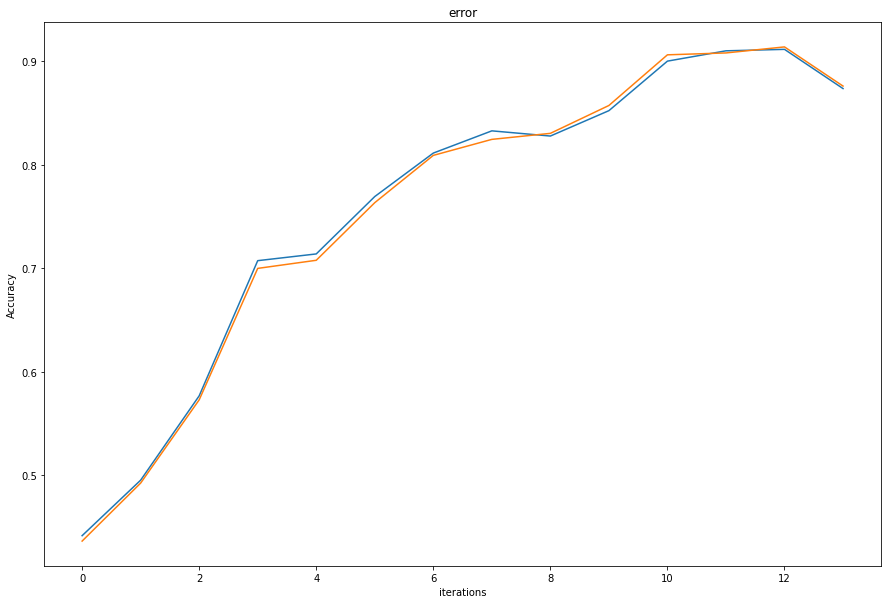

In [197]:
iterations = list(range(epochs))
fig, ax = plt.subplots(figsize = (15, 10))
ax.plot(iterations, training_accuracy, label='Train')
ax.plot(iterations, testing_accuracy, label='Test')
ax.set(title = 'error',
       ylabel= ('Accuracy'), 
       xlabel = ('iterations'))
print("Train Accuracy: {0:.2f}".format(training_accuracy[-1]))
print("Test Accuracy:{0:.2f}".format(testing_accuracy[-1]))